In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import utils 
import experiments.utils_eeg as utils_eeg

from pydmd import DMD

# plot eeg singal 

In [8]:
raw_file = './data/hasc-111018-165936-acc.csv'
raw_label = './data/hasc-111018-165936-acc.label'
raw_df = pd.read_csv(raw_file, header=None)
raw_df.columns = ['time', 'x', 'y', 'z']

column_data_str = list(raw_df.columns.to_numpy())
column_data_str.remove('time')
print(f'choosen column: {column_data_str}')

# label 
breakpoints_index_file = './data/preprocess/hasc_label_index.txt'
breakpoints_df = pd.read_csv(breakpoints_index_file, header=None)
breakpoints_index = breakpoints_df[0].to_numpy()
breakpoints = np.array([0] * raw_df.shape[0])

breakpoints[breakpoints_index] = [1]*len(breakpoints_index)

choosen column: ['x', 'y', 'z']


In [4]:
raw_df.shape

(39397, 4)

In [10]:
def plot_channels(raw_df: pd.DataFrame, column_data_str: str, labels):
    f, ax = plt.subplots(len(column_data_str), 1, figsize=(30, 3 * len(column_data_str)))
    f.tight_layout(pad=2)
    timeseries_len = raw_df.shape[0]
    for index, column_name in enumerate(column_data_str):
        ax[index].plot(range(timeseries_len), raw_df[column_name])
        ax[index].set_title(f"channel: {column_name}", fontsize=20)

        height_line = 1
        ax[index].fill_between(range(timeseries_len), 0, height_line, where=labels > 0, color='red', alpha=0.2, transform=ax[index].get_xaxis_transform())
    plt.show()


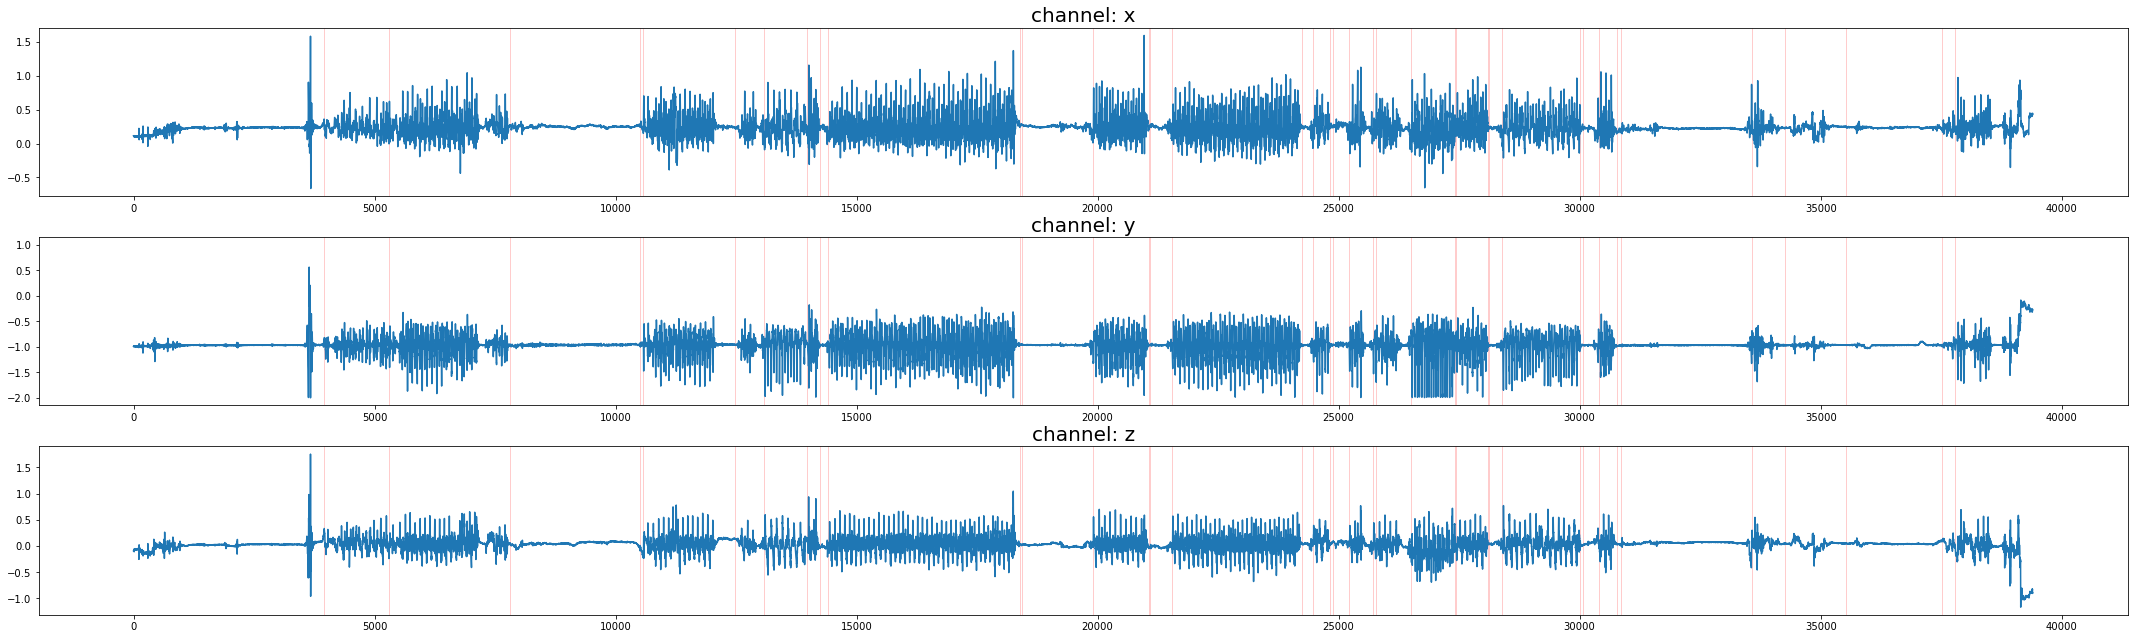

In [11]:
plot_channels(raw_df, column_data_str, breakpoints)

### abc

In [89]:
raw_file = './data/hasc-111018-165936-acc.csv'
raw_label = './data/hasc-111018-165936-acc.label'

raw_df = pd.read_csv(raw_file, header=None)
raw_df.columns = ['time', 'x', 'y', 'z']
raw_label_df = pd.read_csv(raw_label, skiprows=1, header=None)
raw_label_df.columns = ['start', 'end', 'label']
print(f'raw shape: {raw_df.shape}, label shape: {raw_label_df.shape}')
print('Raw activity data')
print(raw_df.head(2))
print('\nraw label data')
print(raw_label_df.head(2))

raw shape: (39397, 4), label shape: (39, 3)
Raw activity data
          time         x         y         z
0  5015.672119  0.115128 -0.988739 -0.090057
1  5015.687371  0.110138 -0.986694 -0.086288

raw label data
      start      end                    label
0  5057.661  5091.26  walk;floor;B2F;steps;44
1  5071.934      NaN       move;escalator;B2F


In [90]:
X = raw_df[['x', 'y', 'z']].to_numpy()
print(f'shape: {X.shape}')

shape: (39397, 3)


In [91]:
dmd = DMD(svd_rank=2)
dmd.fit(X)

In [92]:
dmd.modes.shape

(39397, 2)

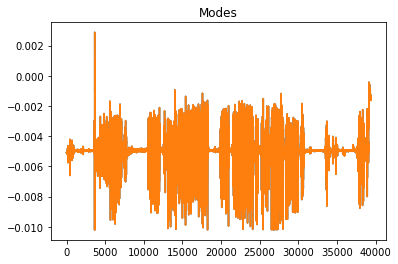

In [93]:
for mode in dmd.modes.T:
    plt.plot(range(len(mode.real)), mode.real)
    plt.title('Modes')
plt.show()

Text(0.5, 1.0, 'Modes')

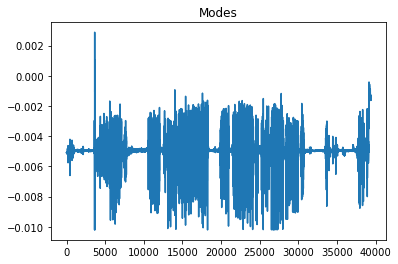

In [94]:
plt.plot(range(len(dmd.modes.T[0].real)), dmd.modes.T[0].real)
plt.title('Modes')

Text(0.5, 1.0, 'Modes')

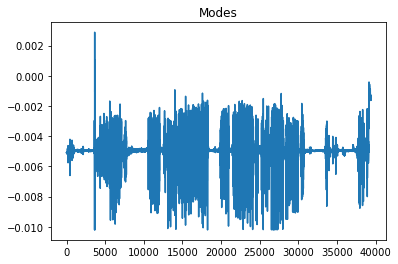

In [95]:
plt.plot(range(len(dmd.modes.T[1].real)), dmd.modes.T[1].real)
plt.title('Modes')

In [63]:
dmd.modes.real

array([[-0.00506833, -0.00506833],
       [-0.00505802, -0.00505802],
       [-0.00508332, -0.00508332],
       ...,
       [-0.00133034, -0.00133034],
       [-0.00135656, -0.00135656],
       [-0.00140032, -0.00140032]])

## EEG

In [2]:
raw_file = './data/eeg_subj1_series1_data.csv'
label_file = './data/eeg_subj1_series1_events.csv'
raw_df = pd.read_csv(raw_file)
raw_df.drop(['id'], axis=1, inplace=True)
raw_df.head()

# label 
labels_df = pd.read_csv(label_file)
labels_df.drop(['id'], axis=1, inplace=True)

labels = utils_eeg.create_break_point_index(labels_df=labels_df)

In [6]:
labels.shape

(119496,)

In [7]:
raw_df.shape

(119496, 32)

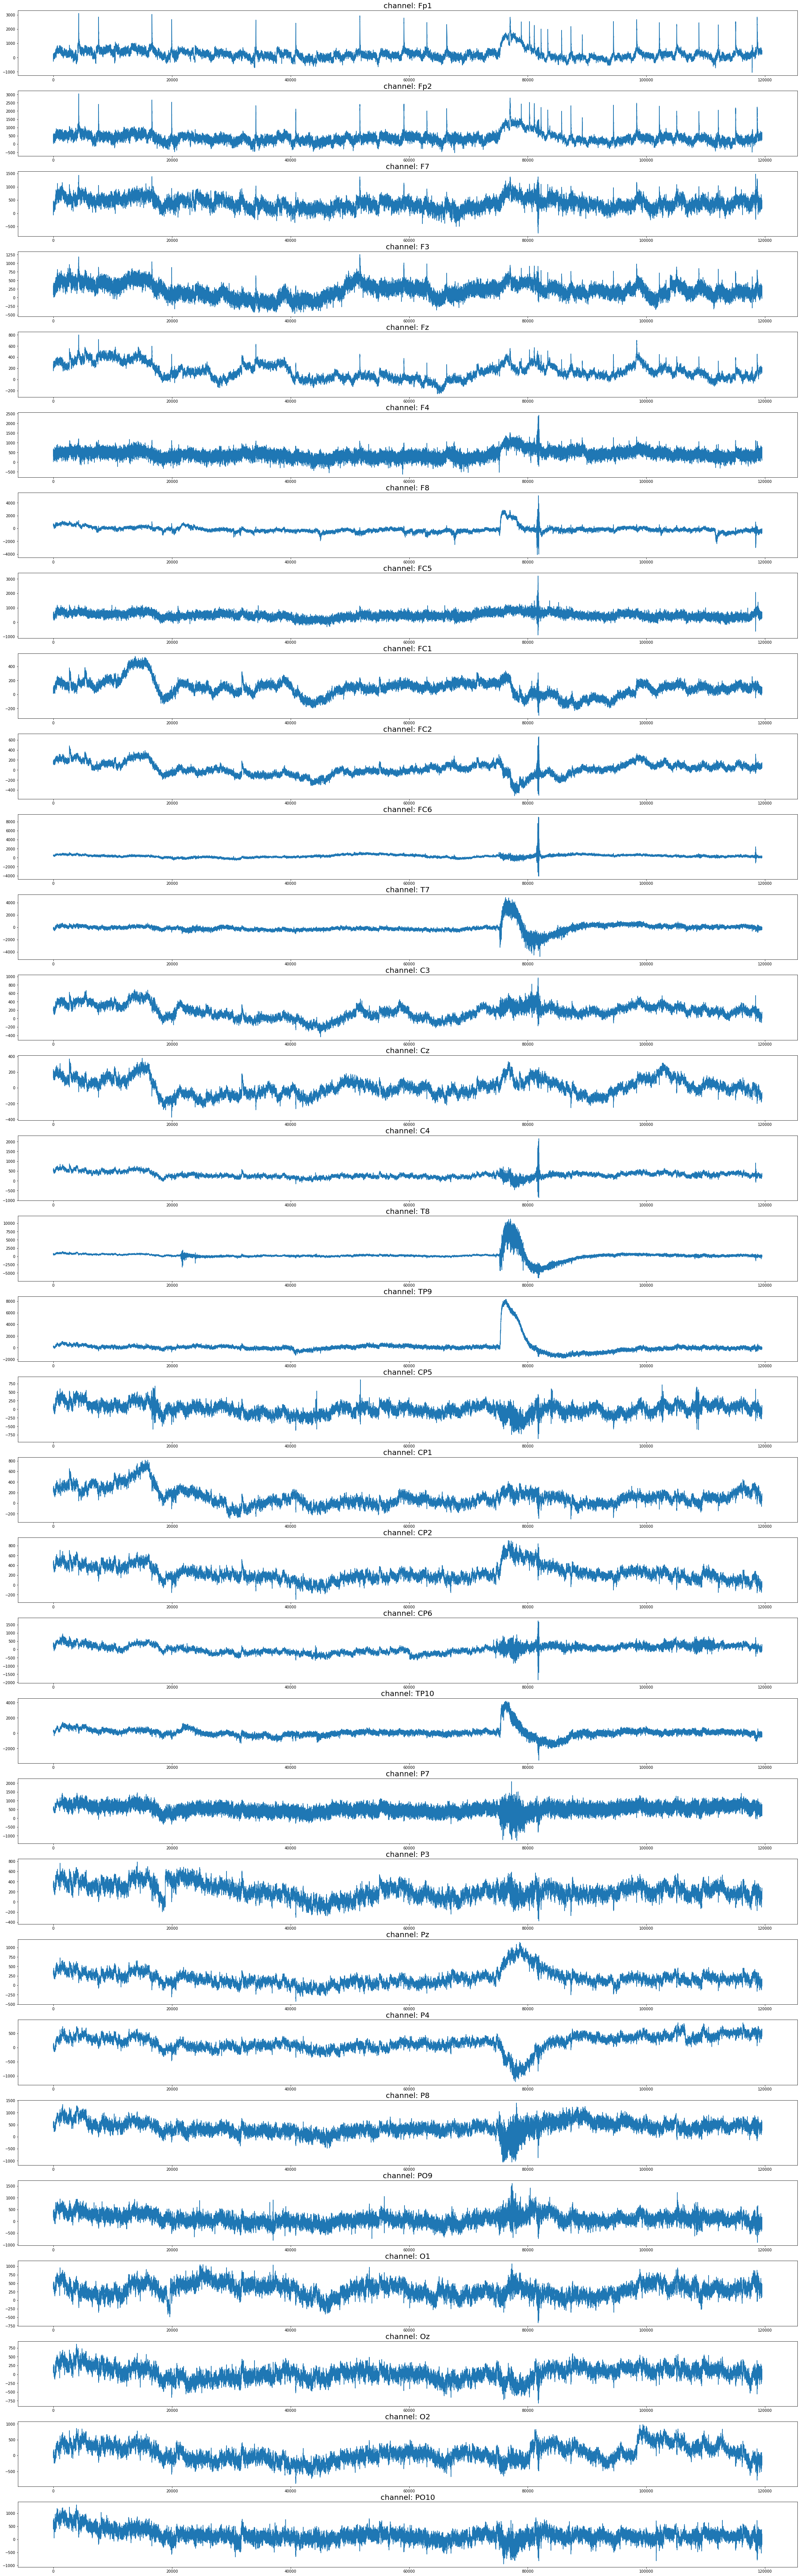

In [35]:
def plot_channels(raw_df: pd.DataFrame, column_data_str: str, labels):
    f, ax = plt.subplots(len(column_data_str), 1, figsize=(30, 3 * len(column_data_str)))
    f.tight_layout(pad=2)
    timeseries_len = raw_df.shape[0]
    for index, column_name in enumerate(column_data_str):
        ax[index].plot(range(timeseries_len), raw_df[column_name])
        ax[index].set_title(f"channel: {column_name}", fontsize=20)

        height_line = 1
        ax.fill_between(range(timeseries_len), 0, height_line, where=labels > 0, color='red', alpha=0.2, transform=ax.get_xaxis_transform())
    plt.show()

choosen_column = list(raw_df.columns)

plot_channels(raw_df, choosen_column)

In [36]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=None,
                random_state=0,
                whiten='unit-variance')
timeseries = transformer.fit_transform(raw_df.to_numpy())


In [39]:
timeseries_df = pd.DataFrame(timeseries)
timeseries_df.head()

0         1         2         3         4         5         6   \
0 -0.001748  0.003880 -0.000375 -0.004433 -0.000537  0.000591 -0.000198   
1 -0.001989  0.003122 -0.000028 -0.004633 -0.000673  0.000157 -0.000302   
2 -0.003267  0.006374 -0.000485 -0.004792 -0.001209 -0.001108 -0.000443   
3 -0.004015  0.007986 -0.000638 -0.006035 -0.000286 -0.000689 -0.000619   
4 -0.004267  0.008192 -0.000665 -0.006080 -0.000169 -0.000909 -0.000599   

         7         8         9   ...        22        23        24        25  \
0  0.003481 -0.015059 -0.000536  ...  0.000592  0.002915  0.000015  0.004521   
1  0.004831 -0.014570 -0.001199  ...  0.000625  0.002261 -0.001886  0.004010   
2  0.005191 -0.013787 -0.001629  ...  0.000847  0.002131  0.000052  0.002783   
3  0.004175 -0.013146 -0.001322  ...  0.000663  0.002271  0.001598  0.002884   
4  0.002840 -0.012571 -0.000463  ... -0.001008  0.002717  0.001053  0.003516   

         26        27        28        29        30        31  
0 -0.004849  0.000113 -0.000667 -0.000735 -0.001025  0.000872  
1 -0.004650 -0.000649  0.000538 -0.000937 -0.000652  0.000443  
2 -0.001847 -0.000756 -0.000045 -0.000616 -0.000542  0.000835  
3 -0.000859  0.000575 -0.000091 -0.001186 -0.001566 -0.000632  
4 -0.000688 -0.000686 -0.000361  0.000013 -0.000892 -0.002959  

[5 rows x 32 columns]

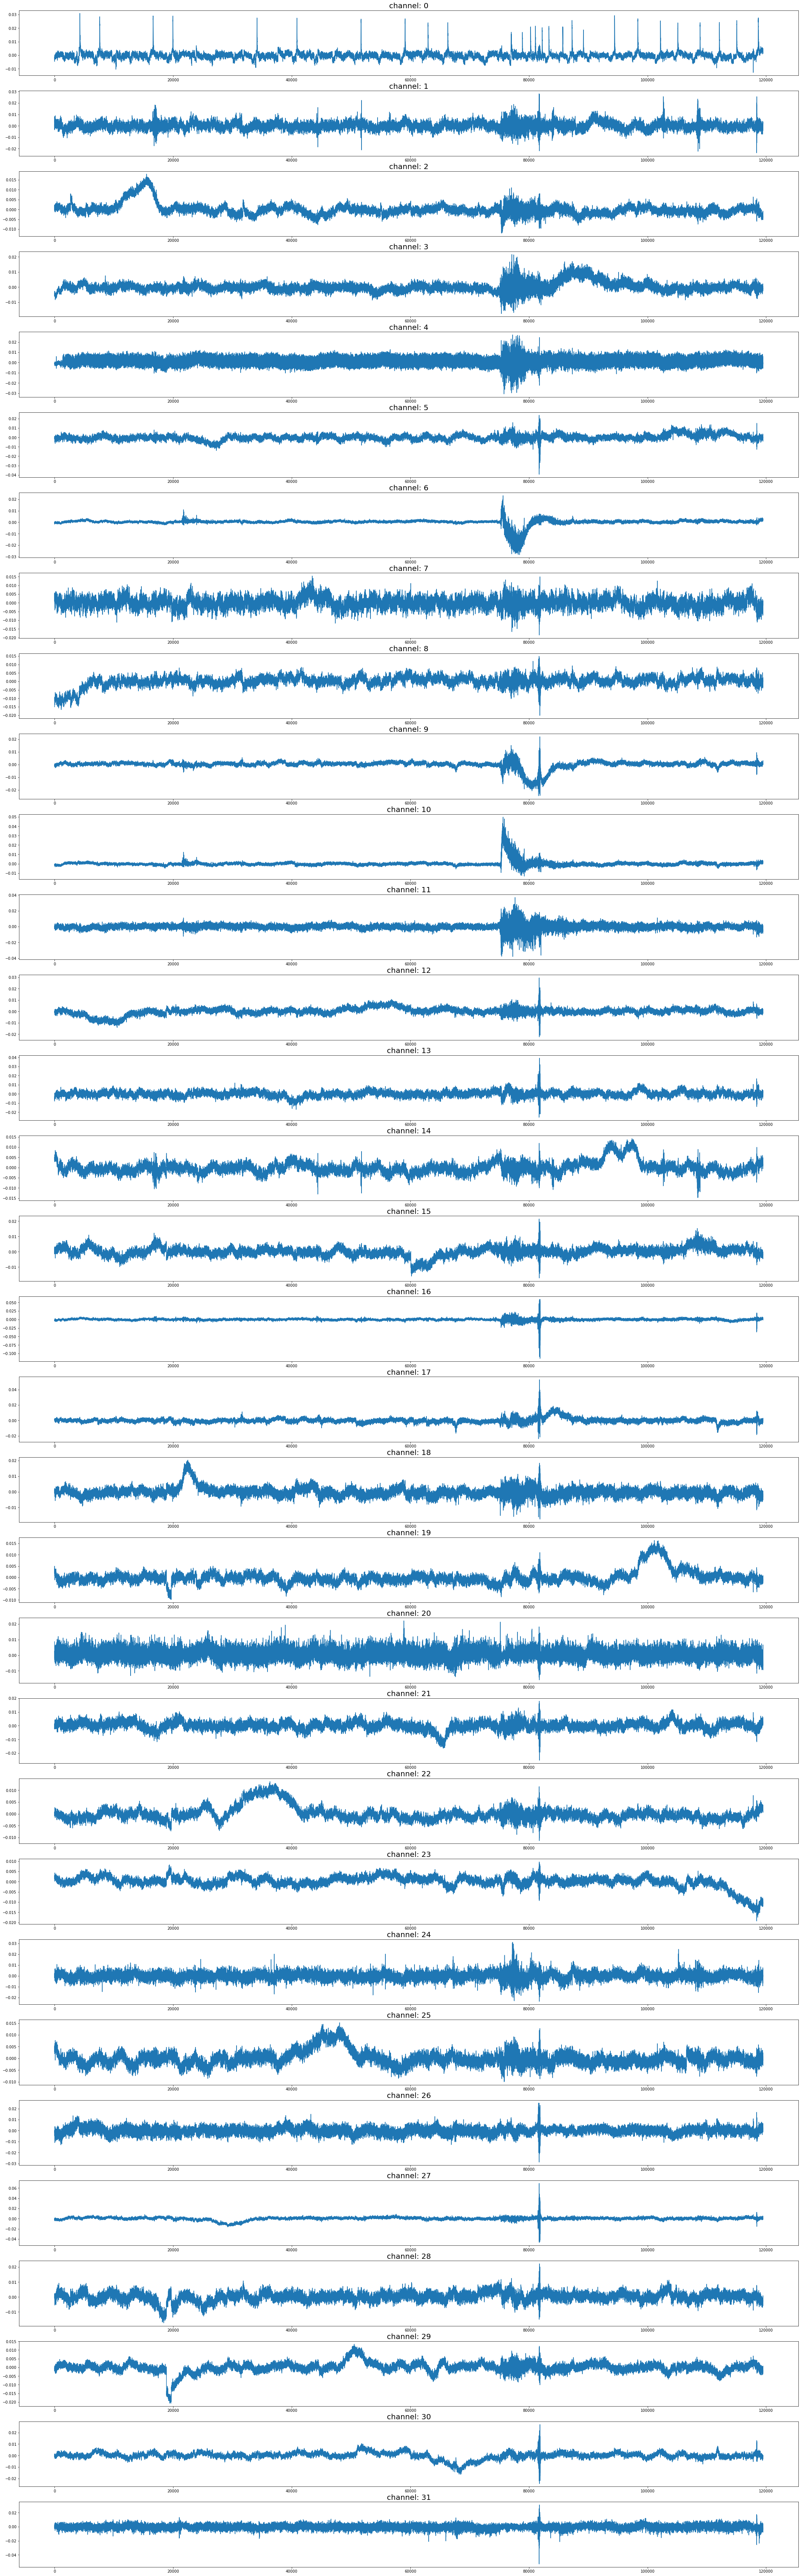

In [41]:
plot_channels(timeseries_df, list(timeseries_df.columns))

In [4]:
from sklearn.decomposition import FastICA
# transformer = FastICA(n_components=None,
#                 random_state=0,
#                 whiten='unit-variance')
# timeseries = transformer.fit_transform(raw_df.to_numpy())

dmd = DMD(svd_rank=3)
dmd.fit(raw_df.to_numpy())

dmd.modes.T[0].real

array([-0.00239853, -0.00245758, -0.00230882, ..., -0.00118909,
       -0.00099176, -0.00084036])

In [10]:
dmd.modes[:, 0:2].shape

(119496, 2)

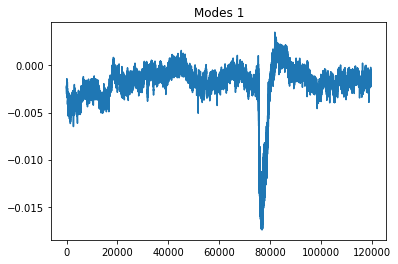

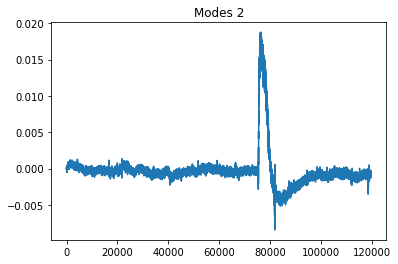

In [11]:
count = 1
for mode in dmd.modes[:, 0:2].T:
    plt.plot(range(len(mode.real)), mode.real)
    # plt.plot(range(20000), mode.real[:20000])
    plt.title(f'Modes {count}')
    count += 1
    plt.show()

In [19]:
dmd.modes.T[0].real

array([ 1.83599989e-03,  1.87063453e-03,  1.67184383e-03, ...,
        2.76851936e-04,  4.92774996e-05, -3.97651743e-06])

# generate data


In [ ]:
data_file = './data/jumpmean/jumpmean-dataset1-training-data.csv'
signal_df = pd.read_csv(data_file)
print(f'signal_df shape: {signal_df.shape}')
timeseries = signal_df.to_numpy() # have to use copy(). It's seem the internal np array has changed somewhere


dmd = DMD(svd_rank=2)
dmd.fit(timeseries)

timeseries = dmd.modes.real